In [47]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [48]:
data = pd.read_csv('/content/Mumbai_Weather_Dataset.csv', delim_whitespace=" ", names = ['month', 'month_date', 'year', 'temprature'] )
data.head(), data.tail()

(   month  month_date  year  temprature
 0      1           1  1995        71.8
 1      1           2  1995        72.0
 2      1           3  1995        70.3
 3      1           4  1995        69.7
 4      1           5  1995        71.3,
       month  month_date  year  temprature
 9261      5           9  2020        87.3
 9262      5          10  2020        87.7
 9263      5          11  2020        88.1
 9264      5          12  2020        87.3
 9265      5          13  2020        85.0)

In [49]:
data.isnull().sum()

month         0
month_date    0
year          0
temprature    0
dtype: int64

I am dropping all the columns except the last column, which means I am taking day- wise temprature data

In [50]:
data.drop(['month', 'month_date', 'year'], axis = 1,  inplace = True)
data.tail()

,temprature
9261,87.3
9262,87.7
9263,88.1
9264,87.3
9265,85.0


In [51]:
data.shape

(9266, 1)

In [52]:
x = np.arange(data.shape[0])

<Figure size 1080x504 with 0 Axes>

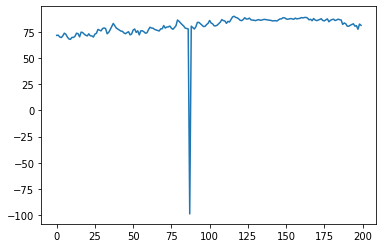

<Figure size 1080x504 with 0 Axes>

In [53]:
plt.plot(x[:200], data['temprature'][:200])
plt.figure(figsize= (15, 7))

In [54]:
training_data = np.array(dataset)

In [55]:
dataset= data['temprature']
training_data = np.array(dataset)
training_data = training_data.reshape(-1, 1)

In [56]:
scaler = MinMaxScaler()
scaled_training_data = scaler.fit_transform(training_data)

In [57]:
scaled_training_data


array([[0.8914405 ],
       [0.89248434],
       [0.88361169],
       ...,
       [0.97651357],
       [0.9723382 ],
       [0.96033403]])

In [58]:
training_size = int(scaled_training_data.shape[0] * 0.8)

train_data = scaled_training_data[:training_size]
test_data = scaled_training_data[training_size:]


In [59]:
train_data.shape, test_data.shape

((7412, 1), (1854, 1))

Converting them into window dataset of 30 days window length

In [60]:
train_data[0:30]

array([[0.8914405 ],
       [0.89248434],
       [0.88361169],
       [0.88048017],
       [0.8888309 ],
       [0.90240084],
       [0.89718163],
       [0.88308977],
       [0.8736952 ],
       [0.87160752],
       [0.88152401],
       [0.88100209],
       [0.88726514],
       [0.90240084],
       [0.89979123],
       [0.88413361],
       [0.90762004],
       [0.90553236],
       [0.89770355],
       [0.89196242],
       [0.8888309 ],
       [0.89926931],
       [0.88935282],
       [0.8888309 ],
       [0.88308977],
       [0.89770355],
       [0.90187891],
       [0.92118998],
       [0.91753653],
       [0.91388309]])

In [61]:
X_train = []
y_train = []
X_test = []
y_test = []
time_stamp = 30
for i in range(len(train_data) - time_stamp - 1):
  X_train.append(train_data[i: i + time_stamp])
  y_train.append(train_data[i+ time_stamp])

for i in range(len(test_data) - time_stamp - 1):
  X_test.append(test_data[i: i + time_stamp])
  y_test.append(test_data[i+ time_stamp])

In [62]:
X_train[0], y_train[0] 

(array([[0.8914405 ],
        [0.89248434],
        [0.88361169],
        [0.88048017],
        [0.8888309 ],
        [0.90240084],
        [0.89718163],
        [0.88308977],
        [0.8736952 ],
        [0.87160752],
        [0.88152401],
        [0.88100209],
        [0.88726514],
        [0.90240084],
        [0.89979123],
        [0.88413361],
        [0.90762004],
        [0.90553236],
        [0.89770355],
        [0.89196242],
        [0.8888309 ],
        [0.89926931],
        [0.88935282],
        [0.8888309 ],
        [0.88308977],
        [0.89770355],
        [0.90187891],
        [0.92118998],
        [0.91753653],
        [0.91388309]]), array([0.92536534]))

In [63]:
X_train[1], y_train[1] 

(array([[0.89248434],
        [0.88361169],
        [0.88048017],
        [0.8888309 ],
        [0.90240084],
        [0.89718163],
        [0.88308977],
        [0.8736952 ],
        [0.87160752],
        [0.88152401],
        [0.88100209],
        [0.88726514],
        [0.90240084],
        [0.89979123],
        [0.88413361],
        [0.90762004],
        [0.90553236],
        [0.89770355],
        [0.89196242],
        [0.8888309 ],
        [0.89926931],
        [0.88935282],
        [0.8888309 ],
        [0.88308977],
        [0.89770355],
        [0.90187891],
        [0.92118998],
        [0.91753653],
        [0.91388309],
        [0.92536534]]), array([0.92849687]))

In [64]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7381, 30, 1), (1823, 30, 1), (7381, 1), (1823, 1))

In [66]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True, input_shape=(30, 1), activation="relu"),
  tf.keras.layers.LSTM(60, return_sequences=True, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(15, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
  ])
model.compile(optimizer= 'adam', loss = 'mse', metrics = ['mae'])
model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
231/231 [==============================] - 21s 85ms/step - loss: 0.0899 - mae: 0.1588 - val_loss: 0.0069 - val_mae: 0.0298
Epoch 2/20
231/231 [==============================] - 19s 84ms/step - loss: 0.0034 - mae: 0.0194 - val_loss: 0.0067 - val_mae: 0.0183
Epoch 3/20
231/231 [==============================] - 19s 84ms/step - loss: 0.0027 - mae: 0.0181 - val_loss: 0.0071 - val_mae: 0.0234
Epoch 4/20
231/231 [==============================] - 19s 82ms/step - loss: 0.0018 - mae: 0.0173 - val_loss: 0.0081 - val_mae: 0.0505
Epoch 5/20
231/231 [==============================] - 19s 84ms/step - loss: 0.0025 - mae: 0.0210 - val_loss: 0.0068 - val_mae: 0.0198
Epoch 6/20
231/231 [==============================] - 19s 84ms/step - loss: 0.0024 - mae: 0.0172 - val_loss: 0.0067 - val_mae: 0.0251
Epoch 7/20
231/231 [==============================] - 20s 85ms/step - loss: 0.0020 - mae: 0.0175 - val_loss: 0.0067 - val_mae: 0.0218
Epoch 8/20
231/231 [==============================] - 19s 84ms

In [67]:
X_train.shape, X_test.shape

((7381, 30, 1), (1823, 30, 1))

In [68]:
predicted_value = model.predict(X_test)
predicted_value.shape, y_test.shape

((1823, 1), (1823, 1))

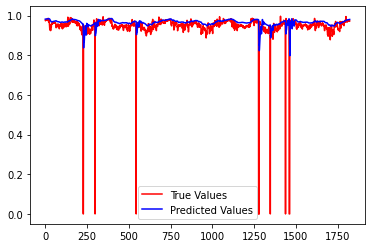

In [69]:
plt.plot(y_test, 'r', label = 'True Values')
plt.plot(predicted_value, 'b', label = 'Predicted Values')
plt.legend()
plt.show()